*   Keyboard shortcuts
*   --pylab inline
*   smaller code blocks
*   shell commands

# Summary Statistics

There are multiple ways to obtain summary statistics for your data in Python. Below, we will demonstrate how to do so using pandas and NumPy.

In [1]:
import pandas as pd
import numpy as np
from random import randint

In [2]:
values1 = np.random.randint(500, size=(10000))
# Defines a ndarray with 10000 random numbers in the range [0-500)
values2 = pd.Series(np.random.randint(500, size=(10000))) # Defines a pandas Series similar to the above ndarray

pandas series are implemented as labeled ndarrays, and hence all statistical methods available for ndarrays can be used with this data structure as well. Below, see the first 10 elements generated for each list of values (note the explicit indexing displayed in the pandas series).

In [3]:
values1[:10]

array([428,  86,  87, 236, 464, 435, 434, 164, 276, 367])

In [4]:
values2[:10]

0    259
1    228
2     59
3    494
4    417
5    183
6    312
7    310
8     68
9    132
dtype: int64

Built-in methods are available for all basic statistics. Some are demonstrated below:

In [5]:
print ('MIN(values1) = ' + str(values1.min()) + '\t\t\tMIN(values2) = ' + str(values2.min()))
print ('MAX(values1) = ' + str(values1.max()) + '\t\t\tMAX(values2) = ' + str(values2.max()) )
print ('RANGE(values1) = ' + str(values1.ptp()) + '\t\t\tRANGE(values2) = ' + str(values2.ptp()))
print ('MEAN(values1) = ' + str(values1.mean()) + '\t\tMEAN(values2) = ' + str(values2.mean()))
print ('STD(values1) = ' + str(values1.std()) + '\tSTD(values2) = ' + str(values2.std()))
print ('VARIANCE(values1) = ' + str(values1.var()) + '\tVARIANCE(values2) = ' + str(values2.var()))

MIN(values1) = 0			MIN(values2) = 0
MAX(values1) = 499			MAX(values2) = 499
RANGE(values1) = 499			RANGE(values2) = 499
MEAN(values1) = 250.587		MEAN(values2) = 248.2052
STD(values1) = 145.13144259945878	STD(values2) = 143.49684256924508
VARIANCE(values1) = 21063.135631	VARIANCE(values2) = 20591.343827342705


Additionally, pandas series have a method called *describe()* that returns a nice summary of these basic statistics.

In [6]:
values2.describe()

count    10000.000000
mean       248.205200
std        143.496843
min          0.000000
25%        125.000000
50%        248.000000
75%        372.000000
max        499.000000
dtype: float64

For non-numerical series objects, *describe()* will return a simple summary of the number of unique values and most frequently occurring ones.

In [7]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

*np.nan* is used to denote missing values. By default, the statistical methods implemented in pandas skip these values, which is not always the case when we are dealing with ndarrays. This behavior can be altered by including the *skipna=False* flag when calling a method.

## Handling missing data with pandas

pandas has great support for missing data. For full documentation, [check this page](http://pandas.pydata.org/pandas-docs/dev/missing_data.html). Below are a few examples of how to work with missing data using pandas.

In [8]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df

,one,two,three
a,-0.681193,-0.214976,-0.790844
c,-1.313181,0.805463,1.087081
e,-0.719149,0.618022,-0.613357
f,1.481327,-0.354071,1.004685
h,0.477954,-1.834039,-0.378837


Above we created a DataFrame with 5 rows and 3 columns and filled it with random numbers. Next we will add two more columns.

In [9]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [10]:
df

,one,two,three,four,five
a,-0.681193,-0.214976,-0.790844,bar,False
c,-1.313181,0.805463,1.087081,bar,False
e,-0.719149,0.618022,-0.613357,bar,False
f,1.481327,-0.354071,1.004685,bar,True
h,0.477954,-1.834039,-0.378837,bar,True


Adding new rows is also simple. Below we include three extra empty rows.

In [11]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.681193,-0.214976,-0.790844,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-1.313181,0.805463,1.087081,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.719149,0.618022,-0.613357,bar,False
f,1.481327,-0.354071,1.004685,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.477954,-1.834039,-0.378837,bar,True


In [12]:
#This is one way to index a column in pandas
df2['one']

a   -0.681193
b         NaN
c   -1.313181
d         NaN
e   -0.719149
f    1.481327
g         NaN
h    0.477954
Name: one, dtype: float64

In [15]:
#This is one way to index a row in pandas
df2.ix['a']

one     -0.681193
two     -0.214976
three   -0.790844
four          bar
five        False
Name: a, dtype: object

pandas has two functions *isnull()* and *notnull()* that return boolean objects when called.

In [16]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [17]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [18]:
a = df[['one','two']]
a['one']['a':'e'] = float('nan')
a

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/series.py:789: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,one,two
a,NaN,-0.214976
c,NaN,0.805463
e,NaN,0.618022
f,1.481327,-0.354071
h,0.477954,-1.834039


In [19]:
b = df[['one','two','three']]
b

,one,two,three
a,-0.681193,-0.214976,-0.790844
c,-1.313181,0.805463,1.087081
e,-0.719149,0.618022,-0.613357
f,1.481327,-0.354071,1.004685
h,0.477954,-1.834039,-0.378837


In [20]:
a + b

,one,three,two
a,NaN,NaN,-0.429951
c,NaN,NaN,1.610925
e,NaN,NaN,1.236044
f,2.962654,NaN,-0.708143
h,0.955909,NaN,-3.668078


In [21]:
a['one'].dropna()

f    1.481327
h    0.477954
Name: one, dtype: float64

Summary statistics all account for missing values. 

*   When summing data, NA (missing) values will be treated as zero
*   If the data are all NA, the result will be NA
*   Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [22]:
a

,one,two
a,NaN,-0.214976
c,NaN,0.805463
e,NaN,0.618022
f,1.481327,-0.354071
h,0.477954,-1.834039


In [23]:
a['one'].sum()

1.959281543287707

In [24]:
a.mean(1)

a   -0.214976
c    0.805463
e    0.618022
f    0.563628
h   -0.678042
dtype: float64

*This is just the bare minimum. pandas has a lot more missing data functionality.*

## Histograms

#### Using pandas

Plotting histograms using pandas is quite straightforward. Using the above *values2* series, we can simply call the *hist()* method.

In [25]:
pdhist = values2.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

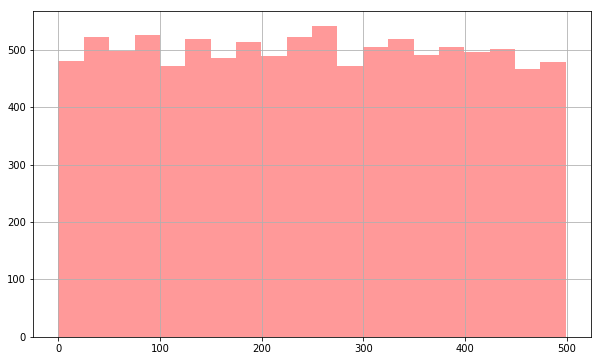

In [26]:
pdhist2 = values2.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

#### Using numpy + matplotlib

While the pandas data structure has a method that automatically wraps around a call to the *hist()* method of the plotting library Matplotlib, we can achieve the same result by performing that call manually on our *values1* ndarray.

In [27]:
import matplotlib.pyplot as plt # Required for plotting

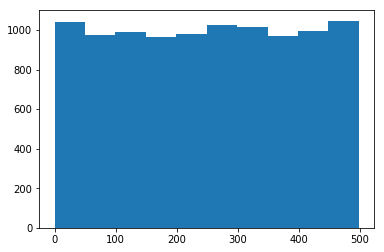

In [28]:
nphist = plt.hist(values1)

## Boxplots

#### Using pandas

pandas DataFrames have a boxplot method that allows you to visualize the distribution of values within each column.

In [29]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )

In [30]:
df.head()

,Col1,Col2
0,0.511496,0.225483
1,0.246599,0.854061
2,0.254457,0.629729
3,0.428012,0.352625
4,0.163232,0.642516


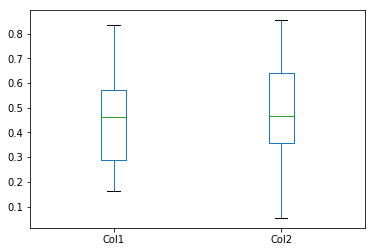

In [31]:
box = df.boxplot(grid=False)

#### Using numpy + matplotlib

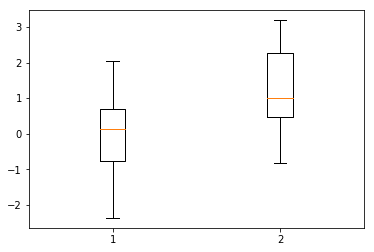

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

## Scatterplots

#### Using pandas

Let's define a dataframe containing 2 columns, each with 200 random numbers < 1.

In [33]:
df = pd.DataFrame(np.random.rand(200,2))

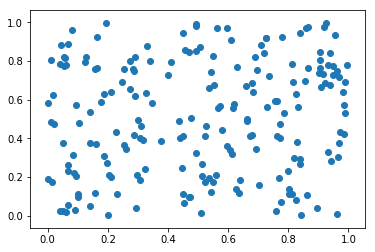

In [34]:
pdscatter = plt.scatter(df[0], df[1])

#### Using numpy + matplotlib

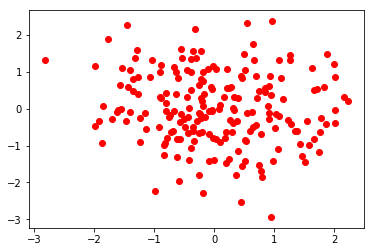

In [35]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')